<a href="https://colab.research.google.com/github/vishalsh2109/Data-Poltergeists/blob/main/preprocessing_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
#Importing admissions,patients,diagnoses tables
admissions=pd.read_csv('/content/admissions_202208161605.csv')
patients=pd.read_csv('/content/patients_202208161605.csv')
diagnoses=pd.read_csv('/content/diagnoses_icd_202208161605.csv')

In [123]:
# Create the heart_failure_diagnoses column in the diagnoses table
heart_failure_icd9_codes = [
    '39891', '40201', '40211', '40291', '40401', '40403', '40411', '40413',
    '40491', '40493', '4280', '4281', '42820', '42821', '42822', '42823',
    '42830', '42831', '42832', '42833', '42840', '42841', '42842', '42843',
    '4289'
]

diagnoses['heart_failure_diagnoses'] = diagnoses['icd9_code'].apply(lambda x: 1 if x in heart_failure_icd9_codes else 0)

In [124]:
diagnoses['heart_failure_diagnoses'].value_counts()

heart_failure_diagnoses
0    629773
1     21274
Name: count, dtype: int64

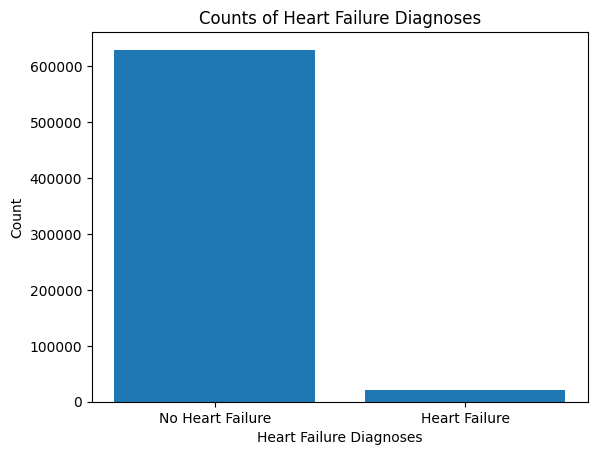

In [125]:
heart_failure_counts = diagnoses['heart_failure_diagnoses'].value_counts()

# Bar chart using NumPy and matplotlib
labels = heart_failure_counts.index
values = heart_failure_counts.values

plt.bar(labels, values)
plt.xlabel('Heart Failure Diagnoses')
plt.ylabel('Count')
plt.title('Counts of Heart Failure Diagnoses')
plt.xticks(labels, ['No Heart Failure', 'Heart Failure'])
# Customizing x-axis ticks if needed
plt.show()

In [126]:
#Removing row_id from all the tables
admissions.drop(columns=['row_id'],inplace=True)
diagnoses.drop(columns=['row_id'],inplace=True)
patients.drop(columns=['row_id'],inplace=True)

In [127]:
data = pd.merge(admissions, diagnoses, on=['hadm_id','subject_id'], how='inner')
data.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,seq_num,icd9_code,heart_failure_diagnoses
0,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,1.0,9678,0
1,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,2.0,9693,0
2,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,3.0,E9502,0
3,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,4.0,E9503,0
4,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,MARRIED,WHITE,2196-04-09 10:06:00.000,2196-04-09 13:24:00.000,BENZODIAZEPINE OVERDOSE,0,1,5.0,3488,0


In [128]:
#Converting admit_time and discharge_time to datetime format
data['admit_time'] = pd.to_datetime(data['admittime'])
data['discharge_time'] = pd.to_datetime(data['dischtime'])

In [129]:
#Calculating the length of stay
data['length_of_stay'] = (data['discharge_time'] - data['admit_time']).dt.days

In [130]:
#merging patients table
data = pd.merge(data, patients, on='subject_id', how='inner')
data.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,...,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
1,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
2,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
3,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0
4,22,165315,2196-04-09 12:26:00.000,2196-04-10 15:54:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,...,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,2131-05-07 00:00:00.000,NaN,NaN,NaN,0


In [131]:
#Calculating age of the patient
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (data['admit_time'].dt.year - data['dob'].dt.year)
data = data[(data['age'] >= 0) & (data['age'] <= 120)]

In [132]:
#After analyszing the data thoroughly some columns were not affecting the heart failure prediction so dropping them
data.drop(columns=['admittime','dischtime','dob','edregtime','edouttime','deathtime','dod','dod_hosp','dod_ssn'],inplace=True)
data.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,...,has_chartevents_data,seq_num,icd9_code,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,expire_flag,age
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,1.0,9678,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
1,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,2.0,9693,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
2,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,3.0,E9502,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
3,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,4.0,E9503,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65
4,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,...,1,5.0,3488,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65


In [133]:
data.isnull().sum()

subject_id                      0
hadm_id                         0
admission_type                  0
admission_location              0
discharge_location              0
insurance                       0
language                   194240
religion                     2929
marital_status              67429
ethnicity                       0
diagnosis                      87
hospital_expire_flag            0
has_chartevents_data            0
seq_num                        45
icd9_code                      45
heart_failure_diagnoses         0
admit_time                      0
discharge_time                  0
length_of_stay                  0
gender                          0
expire_flag                     0
age                             0
dtype: int64

In [134]:
#since language column have more than 30% null values and religion column will not affect the model
data.drop(columns=['language','religion'],inplace=True)

In [135]:
data['admission_type'].value_counts()

admission_type
EMERGENCY    485081
ELECTIVE      73036
NEWBORN       45640
URGENT        12918
Name: count, dtype: int64

In [136]:
data['admission_type'] = data['admission_type'].replace('URGENT', 'EMERGENCY')
data['admission_type'].value_counts()

admission_type
EMERGENCY    497999
ELECTIVE      73036
NEWBORN       45640
Name: count, dtype: int64

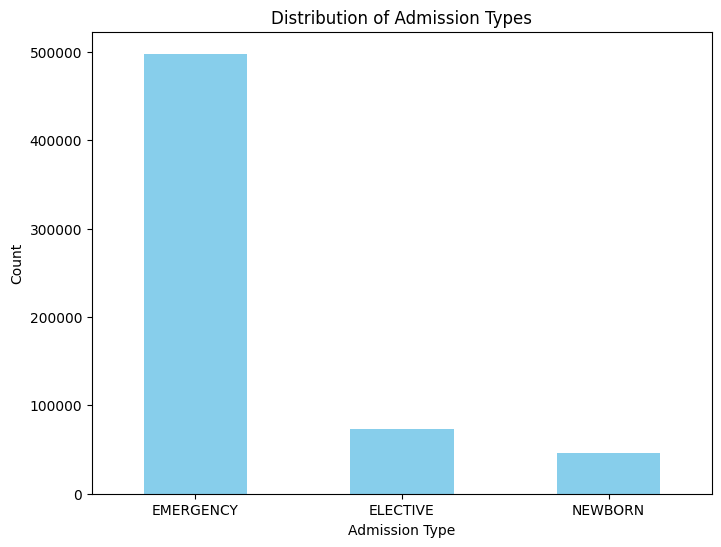

In [137]:
plt.figure(figsize=(8, 6))
data['admission_type'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Distribution of Admission Types')
plt.xticks(rotation=0)
plt.show()

In [138]:
data['marital_status'].value_counts()

marital_status
MARRIED              271909
SINGLE               150725
WIDOWED               75855
DIVORCED              40202
SEPARATED              6824
UNKNOWN (DEFAULT)      3518
LIFE PARTNER            213
Name: count, dtype: int64

In [139]:
data['marital_status'].fillna('UNKNOWN(DEFAULT)',inplace=True)
data['marital_status'] = data['marital_status'].replace(['UNKNOWN (DEFAULT)','UNKNOWN(DEFAULT)'], 'UNKNOWN')
data['marital_status'].value_counts()

marital_status
MARRIED         271909
SINGLE          150725
WIDOWED          75855
UNKNOWN          70947
DIVORCED         40202
SEPARATED         6824
LIFE PARTNER       213
Name: count, dtype: int64

In [140]:
#Handling missing and null values in diagnosis column
data['diagnosis'].fillna('not_specified',inplace=True)
data['diagnosis'].value_counts()

diagnosis
NEWBORN                                                                     45475
PNEUMONIA                                                                   20636
SEPSIS                                                                      17466
CONGESTIVE HEART FAILURE                                                    12030
ALTERED MENTAL STATUS                                                        9521
                                                                            ...  
INTRACRANIAL LESION                                                             1
MR;AORTIC STENOSIS\AORTIC VALVE REPLACEMENT;MITRAL VALVE REPLACEMENT/SDA        1
FEVER/BACK PAIN                                                                 1
NON HEALING WOUND/SDA                                                           1
CEREBRIAL ARTERIOVENOUS MALFORMATION/SDA                                        1
Name: count, Length: 15143, dtype: int64

In [141]:
diagnosis_counts = data['diagnosis'].value_counts()
values_to_replace = diagnosis_counts[diagnosis_counts < 1000].index.tolist()
data['diagnosis'] = data['diagnosis'].replace(values_to_replace, 'Others')
data['diagnosis'].value_counts()

diagnosis
Others                         328428
NEWBORN                         45475
PNEUMONIA                       20636
SEPSIS                          17466
CONGESTIVE HEART FAILURE        12030
                                ...  
CHOLECYSTITIS                    1096
ACUTE MYOCARDIAL INFARCTION      1092
RENAL FAILURE                    1075
STROKE/TIA                       1057
BRAIN MASS                       1030
Name: count, Length: 72, dtype: int64

In [142]:
#On analysing the data ,the finding is the seq_num column is not important
data.drop(columns=['seq_num'],inplace=True)

In [143]:
#Handling missing and null values in icd9_code column
data['icd9_code'] = data['icd9_code'].fillna(data['icd9_code'].mode()[0])
data['icd9_code'].value_counts()

icd9_code
4019     19537
4280     11849
41401    11730
42731    11655
25000     8603
         ...  
66921        1
20042        1
36107        1
71845        1
87264        1
Name: count, Length: 6938, dtype: int64

In [144]:
data['ethnicity'] = data['ethnicity'].replace(['UNKNOWN/NOT SPECIFIED','OTHER','UNABLE TO OBTAIN'], 'UNKNOWN')
data['ethnicity'].value_counts()

ethnicity
WHITE                                                       435222
UNKNOWN                                                      64491
BLACK/AFRICAN AMERICAN                                       61540
HISPANIC OR LATINO                                           16699
ASIAN                                                        10833
PATIENT DECLINED TO ANSWER                                    5530
HISPANIC/LATINO - PUERTO RICAN                                3216
ASIAN - CHINESE                                               2950
BLACK/CAPE VERDEAN                                            1980
WHITE - RUSSIAN                                               1844
MULTI RACE ETHNICITY                                          1292
BLACK/HAITIAN                                                 1178
ASIAN - ASIAN INDIAN                                          1066
WHITE - OTHER EUROPEAN                                        1011
PORTUGUESE                                          

In [145]:
ethnicity_counts = data['ethnicity'].value_counts()
values_to_replace = ethnicity_counts[ethnicity_counts < 1000].index.tolist()
data['ethnicity'] = data['ethnicity'].replace(values_to_replace, 'Others')
data['ethnicity'].value_counts()


ethnicity
WHITE                             435222
UNKNOWN                            64491
BLACK/AFRICAN AMERICAN             61540
HISPANIC OR LATINO                 16699
ASIAN                              10833
Others                              7823
PATIENT DECLINED TO ANSWER          5530
HISPANIC/LATINO - PUERTO RICAN      3216
ASIAN - CHINESE                     2950
BLACK/CAPE VERDEAN                  1980
WHITE - RUSSIAN                     1844
MULTI RACE ETHNICITY                1292
BLACK/HAITIAN                       1178
ASIAN - ASIAN INDIAN                1066
WHITE - OTHER EUROPEAN              1011
Name: count, dtype: int64

In [146]:
data['ethnicity'] = data['ethnicity'].replace(['UNKNOWN'], 'Others')
data['ethnicity'].value_counts()

ethnicity
WHITE                             435222
Others                             72314
BLACK/AFRICAN AMERICAN             61540
HISPANIC OR LATINO                 16699
ASIAN                              10833
PATIENT DECLINED TO ANSWER          5530
HISPANIC/LATINO - PUERTO RICAN      3216
ASIAN - CHINESE                     2950
BLACK/CAPE VERDEAN                  1980
WHITE - RUSSIAN                     1844
MULTI RACE ETHNICITY                1292
BLACK/HAITIAN                       1178
ASIAN - ASIAN INDIAN                1066
WHITE - OTHER EUROPEAN              1011
Name: count, dtype: int64

In [147]:
data['diagnosis_label'] = data['icd9_code'].apply(
    lambda x: 'heart_failure_diagnosis' if x in heart_failure_icd9_codes else 'non_heart_failure_diagnosis'
)
data.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,icd9_code,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,expire_flag,age,diagnosis_label
0,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,Others,0,1,9678,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
1,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,Others,0,1,9693,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
2,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,Others,0,1,E9502,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
3,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,Others,0,1,E9503,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
4,22,165315,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,MARRIED,WHITE,Others,0,1,3488,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis


In [148]:
data.drop(columns=['icd9_code','diagnosis','admission_location','discharge_location'],inplace=True)

In [149]:
data.isnull().sum()

subject_id                 0
hadm_id                    0
admission_type             0
insurance                  0
marital_status             0
ethnicity                  0
hospital_expire_flag       0
has_chartevents_data       0
heart_failure_diagnoses    0
admit_time                 0
discharge_time             0
length_of_stay             0
gender                     0
expire_flag                0
age                        0
diagnosis_label            0
dtype: int64

In [150]:
data.head()

,subject_id,hadm_id,admission_type,insurance,marital_status,ethnicity,hospital_expire_flag,has_chartevents_data,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,expire_flag,age,diagnosis_label
0,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
1,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
2,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
3,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis
4,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,0,65,non_heart_failure_diagnosis


In [151]:
#Removing duplicate rows
data=data.drop_duplicates()


In [152]:
#Removing unimportant columns
data.drop(columns=['has_chartevents_data','hospital_expire_flag','expire_flag'],inplace=True)
data.head()

<ipython-input-152-29b688c33a17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['has_chartevents_data','hospital_expire_flag','expire_flag'],inplace=True)


,subject_id,hadm_id,admission_type,insurance,marital_status,ethnicity,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,age,diagnosis_label
0,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,65,non_heart_failure_diagnosis
7,23,152223,ELECTIVE,Medicare,MARRIED,WHITE,0,2153-09-03 07:15:00,2153-09-08 19:10:00,5,M,71,non_heart_failure_diagnosis
15,23,124321,EMERGENCY,Medicare,MARRIED,WHITE,0,2157-10-18 19:34:00,2157-10-25 14:00:00,6,M,75,non_heart_failure_diagnosis
25,24,161859,EMERGENCY,Private,SINGLE,WHITE,0,2139-06-06 16:14:00,2139-06-09 12:48:00,2,M,39,non_heart_failure_diagnosis
29,25,129635,EMERGENCY,Private,MARRIED,WHITE,0,2160-11-02 02:06:00,2160-11-05 14:55:00,3,M,59,non_heart_failure_diagnosis


In [153]:
data.drop(columns=['diagnosis_label'],inplace=True)

In [154]:
data.head()

,subject_id,hadm_id,admission_type,insurance,marital_status,ethnicity,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,age
0,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,65
7,23,152223,ELECTIVE,Medicare,MARRIED,WHITE,0,2153-09-03 07:15:00,2153-09-08 19:10:00,5,M,71
15,23,124321,EMERGENCY,Medicare,MARRIED,WHITE,0,2157-10-18 19:34:00,2157-10-25 14:00:00,6,M,75
25,24,161859,EMERGENCY,Private,SINGLE,WHITE,0,2139-06-06 16:14:00,2139-06-09 12:48:00,2,M,39
29,25,129635,EMERGENCY,Private,MARRIED,WHITE,0,2160-11-02 02:06:00,2160-11-05 14:55:00,3,M,59


In [155]:
admission_df=data[['subject_id','hadm_id','admit_time','discharge_time','heart_failure_diagnoses']]
admission_df.head()

,subject_id,hadm_id,admit_time,discharge_time,heart_failure_diagnoses
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,0
7,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,0
15,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,0
25,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,0
29,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,0


In [156]:
admission_df.reset_index(drop=True)

,subject_id,hadm_id,admit_time,discharge_time,heart_failure_diagnoses
0,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,0
1,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,0
2,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,0
3,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,0
4,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,0
...,...,...,...,...,...
69034,98794,190603,2127-11-07 11:00:00,2127-11-11 14:30:00,0
69035,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,0
69036,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,0
69037,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,0


In [157]:
# Sort by subject_id and admit_time to simulate PARTITION BY subject_id ORDER BY admit_time
admission_df = admission_df.sort_values(by=['subject_id', 'admit_time'])

In [158]:
# Add ADMITTIME_RANK using rank function
admission_df['ADMITTIME_RANK'] = admission_df.groupby('subject_id').cumcount() + 1

# Find MAX_ADMITTIME_RANK for each subject_id
max_admittime_rank = admission_df.groupby('subject_id')['ADMITTIME_RANK'].max().reset_index()
max_admittime_rank.columns = ['subject_id', 'MAX_ADMITTIME_RANK']

In [159]:
# Merge with main DataFrame to get MAX_ADMITTIME_RANK
readmit_df = admission_df.merge(max_admittime_rank, on='subject_id', how='left')

# Calculate NEXT_ADMITTIME by shifting admit_time within each subject_id group
readmit_df['NEXT_ADMITTIME'] = readmit_df.groupby('subject_id')['admit_time'].shift(-1)

In [160]:
# Initialize columns
readmit_df['30_READMIT'] = -1
readmit_df['INTERVAL'] = np.nan

# Set 30_READMIT based on conditions
readmit_df.loc[readmit_df['ADMITTIME_RANK'] == readmit_df['MAX_ADMITTIME_RANK'], '30_READMIT'] = 0

readmit_sub_df = readmit_df[readmit_df['30_READMIT'] == -1]
interval = (readmit_sub_df['NEXT_ADMITTIME'] - readmit_sub_df['discharge_time']).dt.days.values
readmit_df.loc[readmit_df['30_READMIT'] == -1, 'INTERVAL'] = interval

readmit_df.loc[readmit_df['INTERVAL'] <= 30, '30_READMIT'] = 1
readmit_df.loc[readmit_df['INTERVAL'] > 30, '30_READMIT'] = 0

In [161]:
readmit_df

,subject_id,hadm_id,admit_time,discharge_time,heart_failure_diagnoses,ADMITTIME_RANK,MAX_ADMITTIME_RANK,NEXT_ADMITTIME,30_READMIT,INTERVAL
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,0,1,1,NaT,0,NaN
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,0,1,2,2101-10-20 19:08:00,1,-11.0
2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,1,2,2,NaT,0,NaN
3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,0,1,1,NaT,0,NaN
4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,0,1,1,NaT,0,NaN
...,...,...,...,...,...,...,...,...,...,...
69034,99991,151118,2184-12-24 08:30:00,2185-01-05 12:15:00,1,2,2,NaT,0,NaN
69035,99992,197084,2144-07-25 18:03:00,2144-07-28 17:56:00,0,1,1,NaT,0,NaN
69036,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,0,1,2,2147-02-08 08:00:00,1,-4.0
69037,99995,137810,2147-02-08 08:00:00,2147-02-11 13:15:00,1,2,2,NaT,0,NaN


In [162]:
# Now, create a new column for heart failure readmission
readmit_df['30_READMIT_HF'] = 0

# Identify if the next admission is due to heart failure
readmit_df['NEXT_HEART_FAILURE'] = readmit_df.groupby('subject_id')['heart_failure_diagnoses'].shift(-1)
readmit_df.loc[(readmit_df['30_READMIT'] == 1) & (readmit_df['heart_failure_diagnoses'] == 1) &
               (readmit_df['NEXT_HEART_FAILURE'] == 1), '30_READMIT_HF'] = 1
readmit_df.head()

,subject_id,hadm_id,admit_time,discharge_time,heart_failure_diagnoses,ADMITTIME_RANK,MAX_ADMITTIME_RANK,NEXT_ADMITTIME,30_READMIT,INTERVAL,30_READMIT_HF,NEXT_HEART_FAILURE
0,2,163353,2138-07-17 19:04:00,2138-07-21 15:48:00,0,1,1,NaT,0,NaN,0,NaN
1,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,0,1,2,2101-10-20 19:08:00,1,-11.0,0,1.0
2,3,145834,2101-10-20 19:08:00,2101-10-31 13:58:00,1,2,2,NaT,0,NaN,0,NaN
3,4,185777,2191-03-16 00:28:00,2191-03-23 18:41:00,0,1,1,NaT,0,NaN,0,NaN
4,5,178980,2103-02-02 04:31:00,2103-02-04 12:15:00,0,1,1,NaT,0,NaN,0,NaN


In [163]:
readmit_label_df = readmit_df[['hadm_id', '30_READMIT','30_READMIT_HF']]

In [164]:
readmit_label_df.head()

,hadm_id,30_READMIT,30_READMIT_HF
0,163353,0,0
1,145834,1,0
2,145834,0,0
3,185777,0,0
4,178980,0,0


In [165]:
#Merging readmit label to main dataframe
data = pd.merge(data, readmit_label_df, on='hadm_id', how='inner')
data.head()

,subject_id,hadm_id,admission_type,insurance,marital_status,ethnicity,heart_failure_diagnoses,admit_time,discharge_time,length_of_stay,gender,age,30_READMIT,30_READMIT_HF
0,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,2196-04-09 12:26:00,2196-04-10 15:54:00,1,F,65,0,0
1,23,152223,ELECTIVE,Medicare,MARRIED,WHITE,0,2153-09-03 07:15:00,2153-09-08 19:10:00,5,M,71,0,0
2,23,124321,EMERGENCY,Medicare,MARRIED,WHITE,0,2157-10-18 19:34:00,2157-10-25 14:00:00,6,M,75,0,0
3,24,161859,EMERGENCY,Private,SINGLE,WHITE,0,2139-06-06 16:14:00,2139-06-09 12:48:00,2,M,39,0,0
4,25,129635,EMERGENCY,Private,MARRIED,WHITE,0,2160-11-02 02:06:00,2160-11-05 14:55:00,3,M,59,0,0


In [166]:
data.drop(columns=['admit_time','discharge_time'],inplace=True)
data.head()

,subject_id,hadm_id,admission_type,insurance,marital_status,ethnicity,heart_failure_diagnoses,length_of_stay,gender,age,30_READMIT,30_READMIT_HF
0,22,165315,EMERGENCY,Private,MARRIED,WHITE,0,1,F,65,0,0
1,23,152223,ELECTIVE,Medicare,MARRIED,WHITE,0,5,M,71,0,0
2,23,124321,EMERGENCY,Medicare,MARRIED,WHITE,0,6,M,75,0,0
3,24,161859,EMERGENCY,Private,SINGLE,WHITE,0,2,M,39,0,0
4,25,129635,EMERGENCY,Private,MARRIED,WHITE,0,3,M,59,0,0


In [167]:
# Describe numeric variables
numeric_summary = data[['length_of_stay', 'age']].describe()
print("Summary Statistics for Numeric Variables:")
print(numeric_summary)

# Describe categorical variables
categorical_columns = ['gender', 'ethnicity', 'admission_type', 'insurance','marital_status']
categorical_summary = data[categorical_columns].astype('category').describe()
print("\nSummary Statistics for Categorical Variables:")
print(categorical_summary)

Summary Statistics for Numeric Variables:
       length_of_stay           age
count    94397.000000  94397.000000
mean        10.323665     60.208693
std         12.018600     23.729490
min         -1.000000      0.000000
25%          4.000000     52.000000
50%          7.000000     66.000000
75%         13.000000     78.000000
max        294.000000     89.000000

Summary Statistics for Categorical Variables:
       gender ethnicity admission_type insurance marital_status
count   94397     94397          94397     94397          94397
unique      2        14              3         5              7
top         M     WHITE      EMERGENCY  Medicare        MARRIED
freq    52841     65679          74710     53451          42107


In [168]:
#Encoding categorical values
data=pd.get_dummies(data,columns=['gender','ethnicity','admission_type','insurance','marital_status'],dtype='int64')


data.head()

,subject_id,hadm_id,heart_failure_diagnoses,length_of_stay,age,30_READMIT,30_READMIT_HF,gender_F,gender_M,ethnicity_ASIAN,...,insurance_Medicare,insurance_Private,insurance_Self Pay,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN,marital_status_WIDOWED
0,22,165315,0,1,65,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,23,152223,0,5,71,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,23,124321,0,6,75,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,24,161859,0,2,39,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,25,129635,0,3,59,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [169]:
data=data.reset_index(drop=True)
data.head()

,subject_id,hadm_id,heart_failure_diagnoses,length_of_stay,age,30_READMIT,30_READMIT_HF,gender_F,gender_M,ethnicity_ASIAN,...,insurance_Medicare,insurance_Private,insurance_Self Pay,marital_status_DIVORCED,marital_status_LIFE PARTNER,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_UNKNOWN,marital_status_WIDOWED
0,22,165315,0,1,65,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,23,152223,0,5,71,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,23,124321,0,6,75,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
3,24,161859,0,2,39,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,25,129635,0,3,59,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


                                          subject_id   hadm_id  \
subject_id                                  1.000000  0.012731   
hadm_id                                     0.012731  1.000000   
heart_failure_diagnoses                    -0.014803  0.003190   
length_of_stay                             -0.070047  0.006020   
age                                         0.157904  0.002967   
30_READMIT                                 -0.013245  0.003466   
30_READMIT_HF                              -0.000533 -0.004974   
gender_F                                   -0.002646  0.000698   
gender_M                                    0.002646 -0.000698   
ethnicity_ASIAN                            -0.042395 -0.004298   
ethnicity_ASIAN - ASIAN INDIAN              0.026592 -0.001748   
ethnicity_ASIAN - CHINESE                   0.035190  0.003122   
ethnicity_BLACK/AFRICAN AMERICAN           -0.021827  0.004358   
ethnicity_BLACK/CAPE VERDEAN                0.023022 -0.011600   
ethnicity_

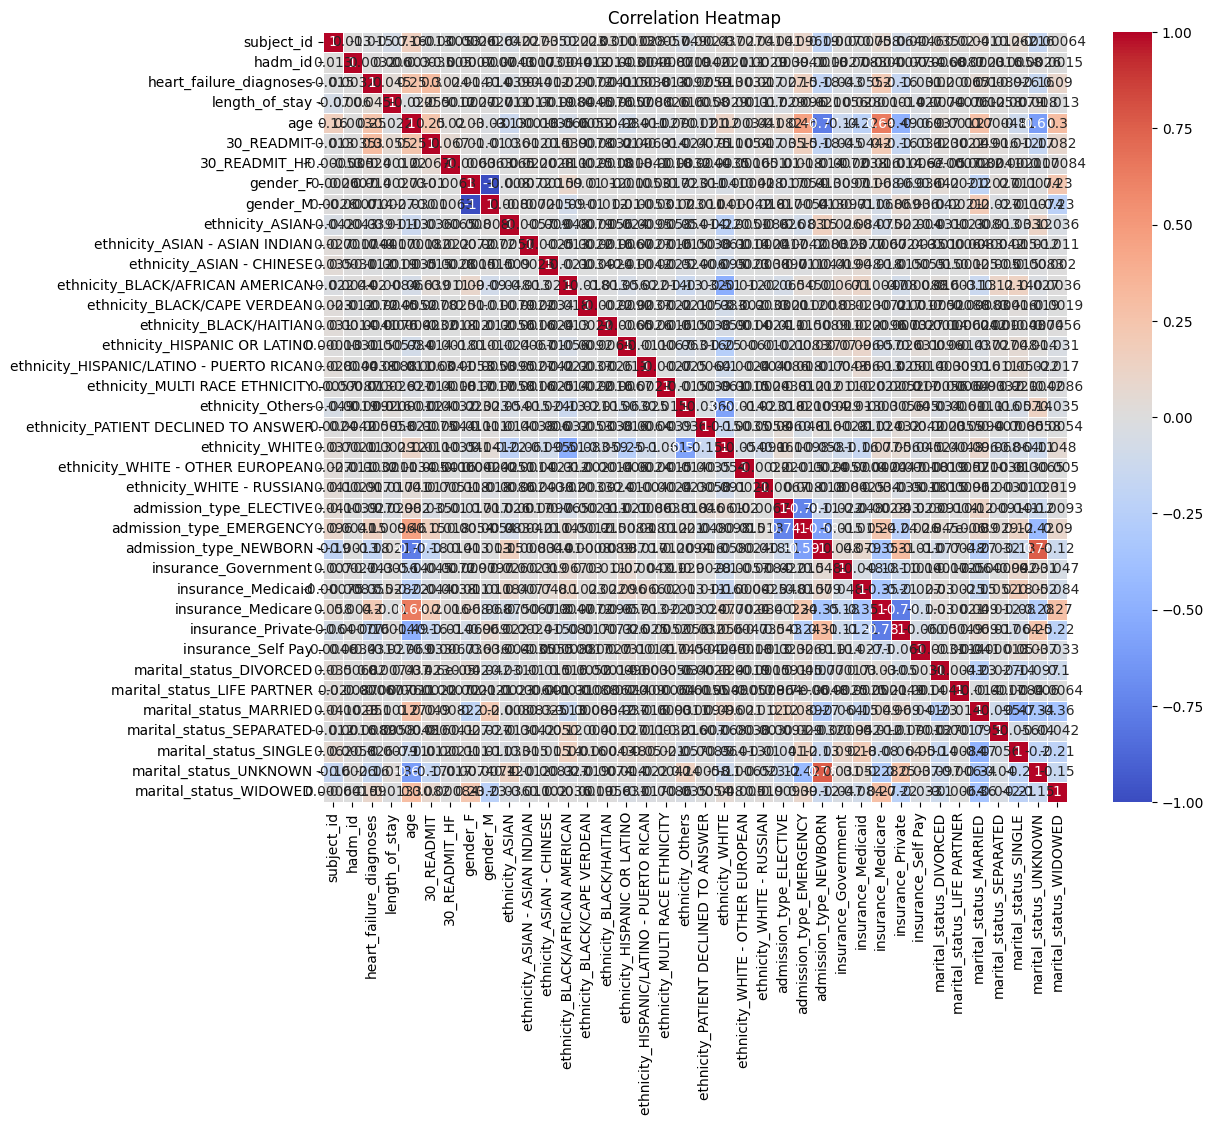

In [170]:
# Example correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [171]:
a = data['30_READMIT_HF'].values

In [172]:
len(a)

94397

In [173]:
H1_num = len(a[a==1])
H0_num = len(a[a==0])
total_num = len(a)

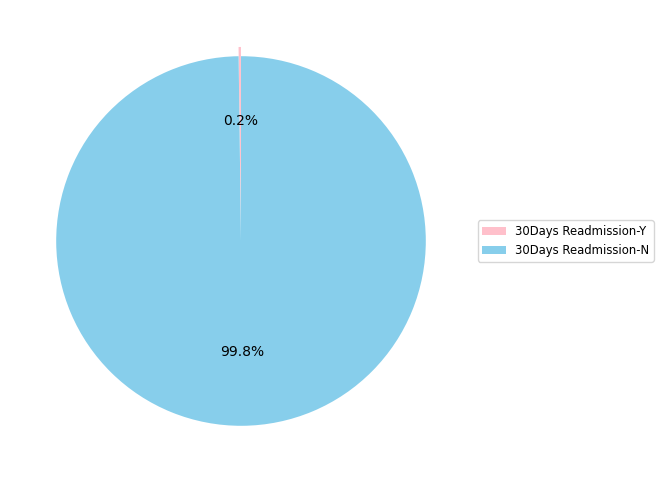

In [174]:
labels = '30Days Readmission-Y', '30Days Readmission-N'
sizes = [H1_num/total_num*100, H0_num/total_num*100]
colors = ['pink', 'skyblue']
explode = (.05, 0)
fig = plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=90)
plt.legend(labels, fontsize='small', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

In [175]:
data.columns

Index(['subject_id', 'hadm_id', 'heart_failure_diagnoses', 'length_of_stay',
       'age', '30_READMIT', '30_READMIT_HF', 'gender_F', 'gender_M',
       'ethnicity_ASIAN', 'ethnicity_ASIAN - ASIAN INDIAN',
       'ethnicity_ASIAN - CHINESE', 'ethnicity_BLACK/AFRICAN AMERICAN',
       'ethnicity_BLACK/CAPE VERDEAN', 'ethnicity_BLACK/HAITIAN',
       'ethnicity_HISPANIC OR LATINO',
       'ethnicity_HISPANIC/LATINO - PUERTO RICAN',
       'ethnicity_MULTI RACE ETHNICITY', 'ethnicity_Others',
       'ethnicity_PATIENT DECLINED TO ANSWER', 'ethnicity_WHITE',
       'ethnicity_WHITE - OTHER EUROPEAN', 'ethnicity_WHITE - RUSSIAN',
       'admission_type_ELECTIVE', 'admission_type_EMERGENCY',
       'admission_type_NEWBORN', 'insurance_Government', 'insurance_Medicaid',
       'insurance_Medicare', 'insurance_Private', 'insurance_Self Pay',
       'marital_status_DIVORCED', 'marital_status_LIFE PARTNER',
       'marital_status_MARRIED', 'marital_status_SEPARATED',
       'marital_status_SINGL

In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94397 entries, 0 to 94396
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   subject_id                                94397 non-null  int64
 1   hadm_id                                   94397 non-null  int64
 2   heart_failure_diagnoses                   94397 non-null  int64
 3   length_of_stay                            94397 non-null  int64
 4   age                                       94397 non-null  int32
 5   30_READMIT                                94397 non-null  int64
 6   30_READMIT_HF                             94397 non-null  int64
 7   gender_F                                  94397 non-null  int64
 8   gender_M                                  94397 non-null  int64
 9   ethnicity_ASIAN                           94397 non-null  int64
 10  ethnicity_ASIAN - ASIAN INDIAN            94397 non-null  

In [177]:
data.to_csv('data.csv',index=False)